# OPENCLASSROOMS - PROJET 6: DÉTECTER DE FAUX BILLETS

## Sommaire

### Mission 0: Analyse des données
#### M0.I. Présentation des données
#### M0.II. Analyses univariées 
#### M0.III. Analyses bivariées

### Mission 1: Analyse en composantes principales
#### M1.I. Calcul des composantes principales
####  M1.II. Éboulis des valeurs propres
####  M1.III. Analyse du cercle des corrélations
####  M1.IV. Projection des individus sur le premier plan factoriel 
####  M1.V. Qualité de représentation des variables et contribution des individus

### Mission 2: Algorithme de classification
#### M2.I. Classification selon l'algorithme des k-means
####  M2.II. Visualisation des résultats obtenus sur le premier plan factoriel de l'ACP


### Mission 3: Régression Logistique
####  M3.I. Régression logistique selon les six variables de base
- M3.I.1. Recherche des variables facteurs
- M3.I.2. Modèle de régression logistique
- M3.I.3. Prédiction des données tests
    
####  M3.II. Régression logistique selon les composantes principales de l'ACP
    
####  M3.III. Algorithmes de classification 
-  M3.III.1. Selon le premier modèle de régression logistique
-  M3.III.2. Selon le second modèle de régression logistique

### Nous importons dans un premier temps l'ensemble des librairies nécessaires pour l'ensemble du projet.

In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import scipy.stats as st
from scipy.stats import ks_2samp

import seaborn as sns
sns.set(style="ticks", color_codes=True)

from sklearn import decomposition
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, r2_score
sc = StandardScaler()
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
import pylab as pl

from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing

from scipy.cluster.hierarchy import dendrogram

import statsmodels.formula.api as smf
import statsmodels.api as sm

from acp import display_circles, display_factorial_planes, display_scree_plot, binaire

# Mission 0: Analyse des données

# M0.I. Présentation et description des données

In [2]:
#Nous appellerons notre tableau principal "billets":

billets = pd.read_csv("data/projet_6/notes.csv")
billets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78
166,False,173.01,104.59,104.31,5.04,3.05,110.91
167,False,172.47,104.27,104.10,4.88,3.33,110.68
168,False,171.82,103.97,103.88,4.73,3.55,111.87


#### Le DataFrame "billets" représente une liste de 170 billets, caractérisés par les 7 variables suivantes:
- [is_genuine] Qui renvoie "True" s'il s'agit d'un billet valide, "False" s'il s'agit d'un faux billet.
- [diagonal] La diagonale du billet (en mm).
- [height_left] La hauteur du billet (mesurée sur le côté gauche, en mm).
- [height_right] La hauteur du billet (mesurée sur le côté droit, en mm).
- [margin_low] La marge entre le bord inférieur du billet et l'image de celui-ci (en mm).
- [margin_right] La marge entre le bord supérieur du billet et l'image de celui-ci (en mm).
- [length] La longueur du billet (en mm).

In [3]:
#Déterminons le nombre de billets valides et le nombre de faux billets dans notre tableau:

print("Nombre de billets valides:", len(billets[billets.is_genuine==True]))
print("Nombre de faux billets:", len(billets[billets.is_genuine==False]))

Nombre de billets valides: 100
Nombre de faux billets: 70


Nous présentons donc une liste de 170 billets, dont 100 valides et de 70 falsifiés, caractérisés par leurs mesures.

# M0.II. Analyses univariées  

In [4]:
#Soient les DataFrames "valids" et "wrongs", présentant respectivement les listes des billets valides et des faux billets:

valids=billets[billets.is_genuine==True].drop(columns="is_genuine")
wrongs=billets[billets.is_genuine==False].drop(columns="is_genuine")

#Nous allons maintenant calculer les mesures de tendances centrales pour chaque variable ainsi que leurs bornes minimum et
#maximum, d'abord dans le cas général, puis pour la liste des vrais billets et pour la liste des faux billets:

print("_"*100) #Pour faire jolie...
print("_"*100)

for X in billets.drop(columns="is_genuine"):
    print(X)
    print("---")
    print("moyenne générale:", billets[X].mean())
    print("moyenne billets valides:", valids[X].mean())
    print("moyenne faux billets:", wrongs[X].mean())
    print("---")
    print("médiane générale:", billets[X].median())
    print("médiane billets valides:", valids[X].median())
    print("médiane faux billets:", wrongs[X].median())
    print("---")
    print("mode général:", billets[X].mode()[0])
    print("mode billets valides:", valids[X].mode()[0])
    print("mode faux billets:", wrongs[X].mode()[0])
    print("---")
    print("variance générale:", billets[X].var())
    print("variance billets valides:", valids[X].var())
    print("variance faux billets:", wrongs[X].var())
    print("---")
    print("Intervalle général:", [min(billets[X]), max(billets[X])])
    print("Intervalle billets valides:", [min(valids[X]), max(valids[X])])
    print("Intervalle faux billets:", [min(wrongs[X]), max(wrongs[X])])
    print("_"*100)
    print("_"*100)

____________________________________________________________________________________________________
____________________________________________________________________________________________________
diagonal
---
moyenne générale: 171.94058823529414
moyenne billets valides: 171.97610000000003
moyenne faux billets: 171.88985714285712
---
médiane générale: 171.945
médiane billets valides: 172.005
médiane faux billets: 171.875
---
mode général: 172.1
mode billets valides: 171.81
mode faux billets: 171.67
---
variance générale: 0.09349432648799193
variance billets valides: 0.09485231313131373
variance faux billets: 0.08846229813664573
---
Intervalle général: [171.04, 173.01]
Intervalle billets valides: [171.04, 172.75]
Intervalle faux billets: [171.38, 173.01]
____________________________________________________________________________________________________
____________________________________________________________________________________________________
height_left
---
moyenne génér

In [5]:
#Résumons certaines de ces informations dans un DataFrame (qu'on appellera "mtc" pour "mesures de tendance centrale"):

df=billets.drop(columns="is_genuine")

mtc=pd.DataFrame({"moyenne": [df[col].mean() for col in df],
                  "moy_vrais": [valids[col].mean() for col in df],
                  "moy_faux": [wrongs[col].mean() for col in df],
                  "variance": [df[col].var() for col in df],
                  "var_vrais": [valids[col].var() for col in df],
                  "var_faux": [wrongs[col].var() for col in df],
                  "etendue_generale": [[min(df[col]), max(df[col])] for col in df],
                  "etendue_vrais": [[min(valids[col]), max(valids[col])] for col in df],
                  "etendue_faux": [[min(wrongs[col]), max(wrongs[col])] for col in df]},
                 index=df.columns)

mtc

,moyenne,moy_vrais,moy_faux,variance,var_vrais,var_faux,etendue_generale,etendue_vrais,etendue_faux
diagonal,171.940588,171.9761,171.889857,0.093494,0.094852,0.088462,"[171.04, 173.01]","[171.04, 172.75]","[171.38, 173.01]"
height_left,104.066353,103.9515,104.230429,0.088914,0.087764,0.045424,"[103.23, 104.86]","[103.23, 104.86]","[103.78, 104.72]"
height_right,103.928118,103.7759,104.145571,0.109548,0.085501,0.064086,"[103.14, 104.95]","[103.14, 104.95]","[103.44, 104.86]"
margin_low,4.612118,4.1435,5.281571,0.492948,0.098916,0.292515,"[3.54, 6.28]","[3.54, 5.04]","[3.82, 6.28]"
margin_up,3.170412,3.0555,3.334571,0.055867,0.039096,0.034263,"[2.27, 3.68]","[2.27, 3.53]","[2.98, 3.68]"
length,112.570412,113.2072,111.660714,0.854604,0.144762,0.458236,"[109.97, 113.98]","[111.76, 113.98]","[109.97, 113.64]"


 On constate alors qu'il est difficile de déterminer l'authenticité d'un billet selon une seule de ces 6 variables. En effet, les mesures de tendance centrales sont généralement proches, mais surtout, on constate que pour chacune de ces variables, les intervalles de mesures entre les vrais et les faux billets sont "emboîtées". Ce qui signifie que nous avons une liste de vrais et de faux billets, dont les mesures des faux pour chaque variable sont globalement similaires à ceux des vrais.

## M0.III. Analyses bivariées

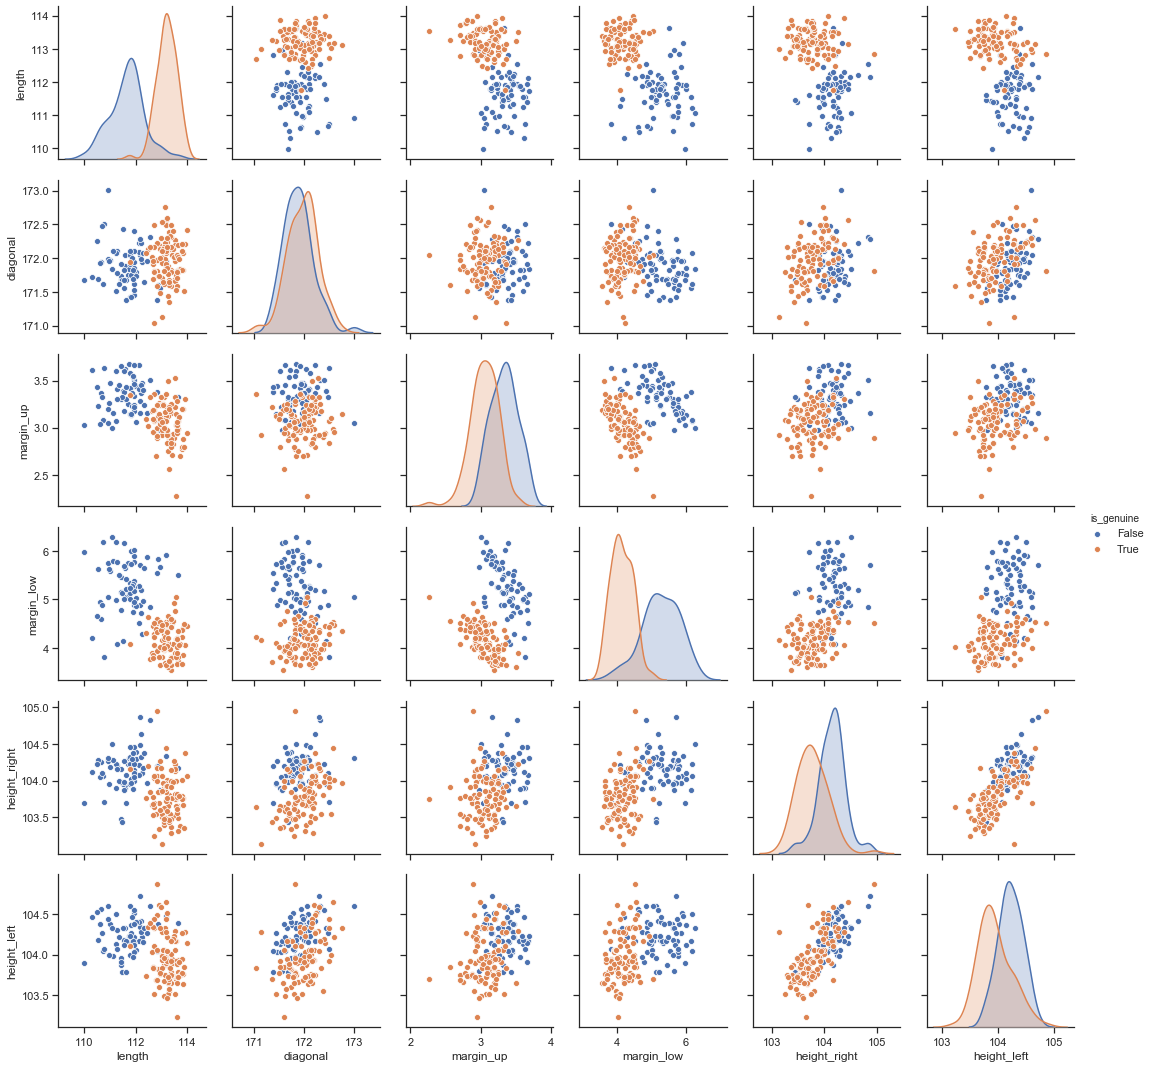

In [6]:
#Analysons le nuage de points de chacune des variables de "billets" deux à deux:

nuages=sns.pairplot(billets, vars=["length", "diagonal", "margin_up", "margin_low", "height_right", "height_left"],
                    hue="is_genuine")
plt.savefig("data/projet_6/graphiques/m0_1_nuages_de_points.png")
plt.show()

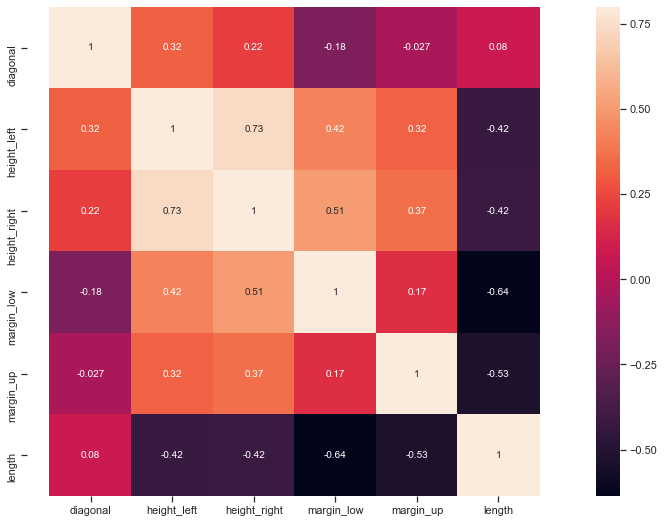

In [7]:
#Puis sa matrice des corrélations:

billets_mat = billets.drop(columns="is_genuine").corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(billets_mat, annot=True, vmax=.8, square=True, cbar="plasma")
plt.axis("equal")
plt.savefig("data/projet_6/graphiques/m0_2_tableau_contingence.png")
plt.show()

####  Analyse des résultats:
- On distingue naturellement une très forte corrélation entre les hauteurs gauche et droite de chaque billet.
- On observe aussi une corrélation forte entre les marges supérieures et inférieures par rapport à la face du billet.
- Puis une corrélation faible entre la longueur et la diagonale du billet.</font>

Remarquons que la corrélation entre les marges supérieures et inférieures par rapport à la face du billet nous indique la "position" de l'image sur la face du billet: En effet, si les bornes inférieures et supérieures sont toutes deux faibles ou toutes deux élevées, cela indique que l'image est "centrée" selon la largeur du billet. À contrario, si l'une des deux est élevée tandis que l'autre est faible, l'image sur la face du billet sera positionnée plus proche du bord haut ou du bord bas du billet. Dans la suite de cette présentation, nous parlerons donc de la position de l'image sur la face du billet pour caractérisée ces deux variables.

# Mission 1: Analyse en composantes principales

# M1.I. Calcul des composantes principales

In [8]:
#Créons la table "pieces", constituée des 6 variables étudiées centrées-réduits sur les billets:

pieces=billets.drop(columns="is_genuine")
X=pieces.values
std_scaler = preprocessing.StandardScaler().fit(X)
X_scaled = std_scaler.transform(X)

pieces=pd.DataFrame(X_scaled,
                  index=pieces.index,
                  columns=pieces.columns)

pieces

,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.428344,2.669454,3.096563,-0.131590,-1.189874,0.281633
1,-0.887559,-1.097697,-0.691254,-0.860126,-1.274740,0.780697
2,-0.362742,-1.030427,-0.509439,-0.303010,-1.232307,1.377405
3,-0.461145,-0.963156,-0.842767,-1.260106,-0.213913,1.149571
4,0.358883,-1.232238,-0.539742,0.611230,-3.820725,1.062777
...,...,...,...,...,...,...
165,0.555689,0.550431,1.581436,0.896930,1.738009,-0.857535
166,3.507789,1.761301,1.157201,0.611230,-0.510944,-1.801418
167,1.736529,0.684972,0.520847,0.382670,0.677182,-2.050950
168,-0.395543,-0.324086,-0.145809,0.168395,1.610710,-0.759892


In [9]:
#Réalisons l'ACP selon 6 composantes (car 6 variables):

n_comp=6
data_pca = pieces.copy()

#Préparation des données pour l'ACP, la table "pieces" étant déjà centrée-réduite, nous éviterons de le faire à nouveau:
data_pca = data_pca.fillna(data_pca.mean())
names = data_pca.index
features = data_pca.columns

#Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

#Présentons les deux nouvelles variables créées dans le tableau appelé "composantes":
composantes=pd.DataFrame(pca.fit_transform(X_scaled), index=pieces.index)
composantes.columns=["F1", "F2", "F3", "F4", "F5", "F6"]
composantes

,F1,F2,F3,F4,F5,F6
0,2.153639,1.599709,1.787451,2.433465,0.699690,-1.267702
1,-2.110416,-0.526039,0.542563,0.344550,0.067440,-0.544601
2,-1.973152,-0.048102,0.858716,0.374812,-0.424886,0.080487
3,-2.059795,-0.089105,-0.531529,0.519548,-0.033267,-0.038261
4,-2.403180,0.412170,3.319507,-0.837043,-0.420151,-0.445099
...,...,...,...,...,...,...
165,2.478626,0.189974,-0.814598,0.107861,-0.899828,0.093078
166,2.585331,2.914472,0.586789,-2.183704,0.274577,-0.509206
167,2.067245,0.845602,-0.610282,-1.714172,0.116958,-0.504338
168,0.739257,-0.972965,-1.359772,-0.191736,-0.243557,0.211429


# M1.II. Éboulis des valeurs propres

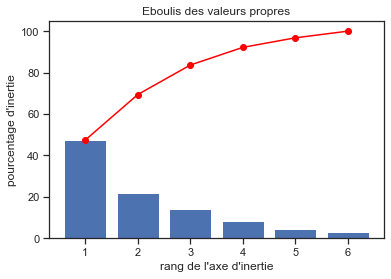

In [10]:
display_scree_plot(pca)

<font color="saddlebrown">Nous avons 6 variables à étudier. Donnons le calcul: 100/6≈16,7. Selon l'éboulis des valeurs propres ci-dessus, seules les nouvelles variables F1 et F2 seront intéressantes à analyser. En effet, elles représentent respectivement 47,4% et 22% de l'inertie totale. Contrairement aux 4 autres variables représentant chacune moins de 15% de l'inertie totale, inertie inférieure donc à celle d'une seule des 6 variables de base. On pourra accorder une importance toute particulière à F1 représentant presque la moitié de l'inertie totale.

# M1.III. Analyse du cercle des corrélations

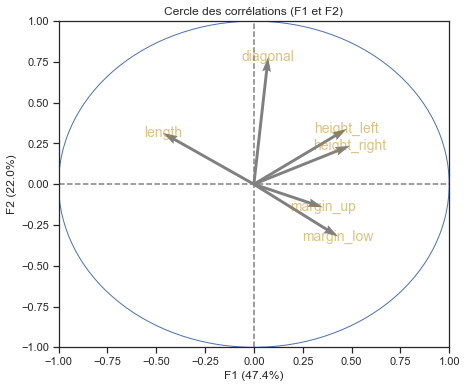

In [11]:
#Analysons donc le cercle des corrélations selon F1 et F2, représentant cumulées près de 70% de l'inertie totale:

pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

Il semble, selon F1 représentant 47,4% de l'inertie totale, y avoir une corrélation entre l'épaisseur du billet (variable height_left et height_right) et la position de l'image de la face du billet (margin_up et margin_low), ces 4 dernières variables étant également anticorrélées à la longueur du billet (lenght). Plus la valeur attribuée à un billet selon F1 est grande, plus on peut estimer qu'il est épais, que la face de l'image est centrée et que sa longueur est courte.
F2, représentant 22% de l'inertie totale, elle, est notamment corrélée à la longueur de la diagonale du billet, mais aussi légèrement à son épaisseur (height_left et height_right) ainsi qu'à sa longueur (lenght), et légèrement anti-corrélé à la position de l'image de la face. Un billet présentant une valeur haute pour F2 sera donc un billet doté d'une grande diagonale, et potentiellement d'une grande épaisseur, d'une  grande longueur et d'une image de face centrée.

# M1.IV. Projetction des individus sur le premier plan factoriel

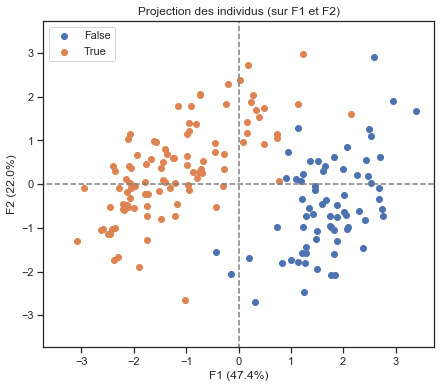

In [12]:
#Projection des individus:

pieces["is_genuine"]=billets["is_genuine"]

X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = pieces["is_genuine"])
plt.show()

 On distingue alors bien le nuage des billets valides du nuage des faux billets sur le plan factoriel selon F1 et F2. On remarque que ces deux nuages de points se distinguent notamment selon F1 (selon l'axe des abscisses) mais très peu selon F2 (selon l'axe des ordonnées). D'après les caractéristiques de F1 et F2 décrites en amont, on en déduit que les faux billets présentent généralement une plus grande épaisseur, une plus faible longueur, et une image plus centrée sur la face du billet. La longueur de la diagonale semble être globalement similaire d'un vrai à un faux billet.

# M1.V. Qualité de réprésentation des variables et contributions des individus

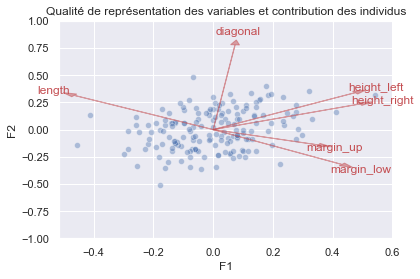

In [13]:
#Réalisons un diagramme des individus et des variables sur le plan factoriel selon F1 et F2:
labels=data_pca.columns.values

score= X_scaled[:,0:2]
coeff=np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]

xs = score[:,0]
ys = score[:,1]  

scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())

sns.set()  
fig, ax = plt.subplots()  
sns.scatterplot(xs * scalex,ys * scaley, alpha=0.4) 
for i in range(n):
    ax.arrow(0, 0, coeff[i,0]*1, coeff[i,1]*1,color = 'r',alpha = 0.5, head_width=.03)
    ax.text(coeff[i,0]*1.15, coeff[i,1]*1.15 , labels[i], color = 'r', ha = 'center', va = 'center')
ax.set(xlabel='F1', ylabel='F2',
       title="Qualité de représentation des variables et contribution des individus")
ax.set_ylim((-1, 1))

plt.savefig("data/projet_6/graphiques/m1_4_qualite_contribution.png")

plt.show()

####  Observation:
-  F1 est donc notamment représentée par les hauteurs gauche et droite d'un billet, ainsi que négativement par sa longueur et sa marge basse par rapport à sa face. La variable "margin_up" est moins bien représentée que les 4 dernières par F1, sa norme étant plus petite, mais reste fortement corrélée à "margin_low".
-  F2 est notamment représentée par la diagonale du billet. Nous observons que le nuage des individus n'est pas très répartie selon cette variable et nous avons vu lors de la projection des individus sur le premier plan factoriel que la distinction des vrais et des faux billets ne se faisait pas selon cet axe. Nous pouvons alors supposer la variable "diagonale" comme non-significative pour distinguer les vrais des faux billets.
-  Concernant les individus, on remarque que très semblent "se distinguer" légèrement du nuage de points. On peut alors considérer l'absence d'outliers dans nos données.

# Mission 2: Algorithme de classification


# M2.I. Classification selon l'algorithme des k-means

Nous allons réaliser un clustering sur les billets selon leurs données en deux groupes. Puis nous analyserons cette séparation effectuée par l'algorithme des k-means, afin de voir s'il "mélange" les vrais et les faux billets.

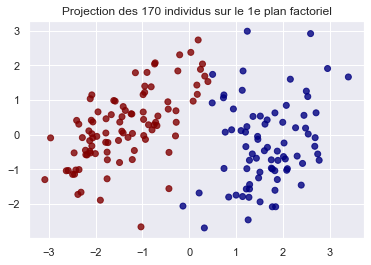

In [14]:
km = KMeans(n_clusters=2)
km.fit(X_scaled)
clusters = km.labels_
pca2 = decomposition.PCA(n_components=5).fit(X_scaled)
X_scaled_projected = pca2.transform(X_scaled)

plt.scatter(X_scaled_projected[:, 0], X_scaled_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.8)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_scaled_projected.shape[0]))
plt.savefig("data/projet_6/graphiques/m2_1_projection_kmeans.png")
plt.show(block=False)

 L'algorithme des K-means fait alors survenir deux clusters bien distincts selon les variables. La matrice de confusion nous indiqueras alors s'il les vrais billets se distinguent des faux selon cet algorithme.

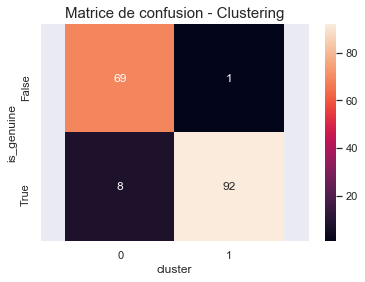

In [15]:
billets["cluster"]=clusters

confusion = pd.crosstab(billets.is_genuine, billets.cluster)

sns.heatmap(confusion, annot=True, xticklabels=True, yticklabels=True)
plt.axis("equal")
plt.title("Matrice de confusion - Clustering", fontsize=15)
plt.savefig("data/projet_6/graphiques/m2_2_confusion_clustering.png")
plt.show()

 On remarque alors que les deux clusters sont bien corrélés l'un aux faux et l'autre aux vrais billets. Mais l'algorithme des K-means a tout de même modélisé quelques billets dans le clusters corrélé aux vrais et inversement. Ce qui nous montre que certains faux billets dans notre tableau ont des caractéristiques similaires à celles des vrais, et inversement. Nous appellerons ces billets dans la deuxième partie de la mission 2 les "mal rangés".

# M2.II. Visualisation des résultats obtenus sur le 1er plan factoriel de l'ACP

In [16]:
#Reprenons le DataFrame "pieces" qui contient les données centrées-réduites du DataFrame "billets", ajoutons-y dans un premier
#temps la colonne "cluster" renvoyant le cluster attribué au billet en question suite à l'algorithme des k-means:

pieces["cluster"]=clusters

 Nous allons maintenant distinguer les 4 cas suivant en vue d'une projection sur le plan factoriel obtenu par ACP:
-  Les vrais billets dans le cluster 0.
- Les faux billets dans le cluster 0.
- Les vrais billets dans le cluster 1.
- Les faux billets dans le cluster 1.

In [17]:
#Créons deux fonctions nous permettant de générer une colonne nous renvoyant chacune de ces 4 catégories:
def fct(a):
    if a==True:
        return(2)
    else: return(4)
    
def catego(a):
    if a==2:
        return("True, cluster 0")
    elif a==4:
        return("False, cluster 0")
    elif a==3:
        return("True, cluster 1")
    else:
        return("False, cluster 1")

#Nous appellerons "categ" la colonne en question:
pieces["categ"]=pieces["is_genuine"].apply(fct)+pieces["cluster"]
pieces["categ"]=pieces["categ"].apply(catego)

pieces.head(5)

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine,cluster,categ
0,-0.428344,2.669454,3.096563,-0.131590,-1.189874,0.281633,True,0,"True, cluster 0"
1,-0.887559,-1.097697,-0.691254,-0.860126,-1.274740,0.780697,True,1,"True, cluster 1"
2,-0.362742,-1.030427,-0.509439,-0.303010,-1.232307,1.377405,True,1,"True, cluster 1"
3,-0.461145,-0.963156,-0.842767,-1.260106,-0.213913,1.149571,True,1,"True, cluster 1"
4,0.358883,-1.232238,-0.539742,0.611230,-3.820725,1.062777,True,1,"True, cluster 1"


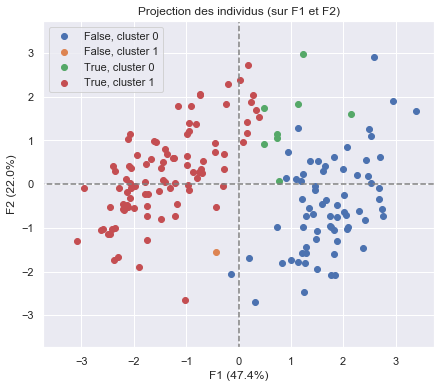

In [18]:
#Projetons maintenant ces résultats sur le plan factoriel obtenu par ACP:

display_factorial_planes(X_projected, n_comp, pca2, [(0,1)], illustrative_var = pieces["categ"])
plt.show()

 On remarque que les billets "mal rangés" par l'algorithme des k-means se situent plus ou moins sur une diagonale imaginaire séparant les deux nuages de points des clusters sur ce plan factoriel. Ce qui nous indique que les billets "mal rangés" se distinguent tout de même de la majorité des autres. On en déduit également que les deux composantes principales F1 et F2 tirées de l'ACP présentent une inertie relativement fiable pour distinguer les vrais des faux billets.

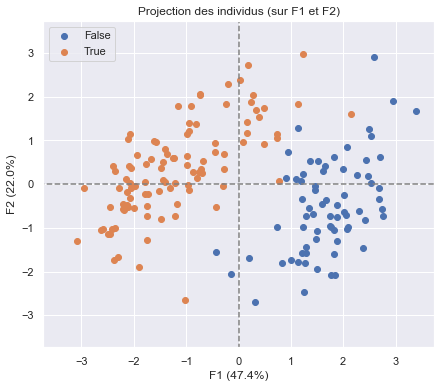

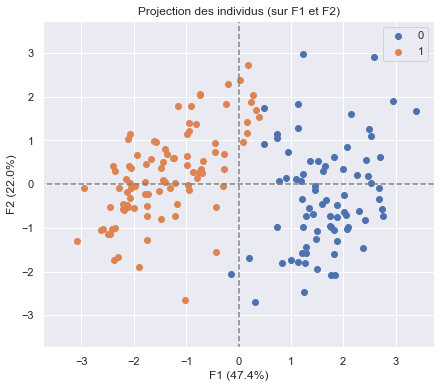

In [19]:
#Enfin, comparons la projection des individus sur le plan factoriel obtenu par ACP selon l'authenticité des billets, avec la
#projection des individus sur le plan factoriel obtenu par ACP selon le clustering issu de l'algorithme des K-means:

display_factorial_planes(X_projected, n_comp, pca2, [(0,1)], illustrative_var = pieces["is_genuine"])
plt.show()

display_factorial_planes(X_projected, n_comp, pca2, [(0,1)], illustrative_var = pieces["cluster"])
plt.show()

  On observe naturellement une séparation plus linéaire sur le deuxième plan par rapport au premier. Il n'y a pas de "parfaite" séparation des vrais et des faux billets dans nos données, c'est pourquoi l'algorithme de régression logistique que nous établirons dans la mission 3 présentera pour certains billets une probabilité d'authenticité oscillant autout de 0.5.

# Mission 3: Régression logistique


# M3.I. Régression logistique selon les six variables de base

## M3.I.1. Recherche des variables facteurs 

In [20]:
#Pour commencer, réinitialisons les DataFrames "billets" et "pieces":

billets=billets.drop(columns="cluster")
pieces=pieces.drop(columns=["is_genuine", "cluster", "categ"])

#On rappelle que le DataFrame "pieces" contient les données centrées-réduites de "billets" à l'exception de la colonne 
#"is_genuine". Considérons "X_scaled", ces données centrées-réduites:

X_scaled=pieces.copy()

X_scaled

,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.428344,2.669454,3.096563,-0.131590,-1.189874,0.281633
1,-0.887559,-1.097697,-0.691254,-0.860126,-1.274740,0.780697
2,-0.362742,-1.030427,-0.509439,-0.303010,-1.232307,1.377405
3,-0.461145,-0.963156,-0.842767,-1.260106,-0.213913,1.149571
4,0.358883,-1.232238,-0.539742,0.611230,-3.820725,1.062777
...,...,...,...,...,...,...
165,0.555689,0.550431,1.581436,0.896930,1.738009,-0.857535
166,3.507789,1.761301,1.157201,0.611230,-0.510944,-1.801418
167,1.736529,0.684972,0.520847,0.382670,0.677182,-2.050950
168,-0.395543,-0.324086,-0.145809,0.168395,1.610710,-0.759892


Nous avons vu lors des missions précédentes que nous ne pouvions effectuer une "parfaite" séparation des vrais et des faux billets selon nos données uniquement. Nous allons donc maintenant appliquer une régression logistique sur "billets" selon la fonction Logit.

In [21]:
reg=sm.Logit(billets.is_genuine, X_scaled).fit(method="lbfgs")
print(reg.summary())

                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                  170
Model:                          Logit   Df Residuals:                      164
Method:                           MLE   Df Model:                            5
Date:                Thu, 25 Jun 2020   Pseudo R-squ.:                  0.9999
Time:                        15:17:34   Log-Likelihood:             -0.0086318
converged:                       True   LL-Null:                       -115.17
Covariance Type:            nonrobust   LLR p-value:                 9.084e-48
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
diagonal        -1.5840     46.270     -0.034      0.973     -92.271      89.103
height_left      0.1350     51.880      0.003      0.998    -101.547     101.817
height_right     4.2889     69.600      0.06

 Constatons que chaque p_values est supérieure à 0,05 ce qui signifie qu'en effectuant une régression logistique sur l'ensemble des variables, aucune ne paraît significative. Nous allons donc retirer la variable "height_left" présentant la plus grande de ces p_values.

In [22]:
X_scaled=X_scaled.drop(columns="height_left")

reg=sm.Logit(billets.is_genuine, X_scaled).fit(method="lbfgs")
print(reg.summary())

                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                  170
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            4
Date:                Thu, 25 Jun 2020   Pseudo R-squ.:                   1.000
Time:                        15:17:35   Log-Likelihood:             -0.0049526
converged:                       True   LL-Null:                       -115.17
Covariance Type:            nonrobust   LLR p-value:                 1.116e-48
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
diagonal        -2.0869     42.401     -0.049      0.961     -85.191      81.017
height_right     3.7311     88.446      0.042      0.966    -169.620     177.082
margin_low     -42.3666    134.392     -0.31

  Encore une fois, chaque p_values est supérieure à 0,05. Nous pouvons donc encore retirer la variable présentant la plus grande de ces p_values, puis réitérer cette opération, et ce jusqu'à obtenir uniquement des variables significatives.

In [23]:
X_scaled=X_scaled.drop(columns="height_right")

reg=sm.Logit(billets.is_genuine, X_scaled).fit(method="lbfgs")
print(reg.summary())

                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                  170
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            3
Date:                Thu, 25 Jun 2020   Pseudo R-squ.:                   1.000
Time:                        15:17:35   Log-Likelihood:             -0.0034550
converged:                       True   LL-Null:                       -115.17
Covariance Type:            nonrobust   LLR p-value:                 1.167e-49
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
diagonal      -1.3567     24.966     -0.054      0.957     -50.290      47.577
margin_low   -50.2192    124.972     -0.402      0.688    -295.161     194.722
margin_up    -20.5963     81.510     -0.253      0.8

In [24]:
X_scaled=X_scaled.drop(columns="diagonal")

reg=sm.Logit(billets.is_genuine, X_scaled).fit(method="lbfgs")
print(reg.summary())

                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                  170
Model:                          Logit   Df Residuals:                      167
Method:                           MLE   Df Model:                            2
Date:                Thu, 25 Jun 2020   Pseudo R-squ.:                  0.9999
Time:                        15:17:36   Log-Likelihood:             -0.0068771
converged:                       True   LL-Null:                       -115.17
Covariance Type:            nonrobust   LLR p-value:                 9.628e-51
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
margin_low   -47.5281     92.385     -0.514      0.607    -228.599     133.543
margin_up    -19.2774     71.118     -0.271      0.786    -158.667     120.112
length        17.9005     61.578      0.291      0.7

In [25]:
X_scaled=X_scaled.drop(columns="margin_up")

reg=sm.Logit(billets.is_genuine, X_scaled).fit(method="lbfgs")
print(reg.summary())

                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                  170
Model:                          Logit   Df Residuals:                      168
Method:                           MLE   Df Model:                            1
Date:                Thu, 25 Jun 2020   Pseudo R-squ.:                  0.9613
Time:                        15:17:36   Log-Likelihood:                -4.4520
converged:                       True   LL-Null:                       -115.17
Covariance Type:            nonrobust   LLR p-value:                 4.379e-50
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
margin_low    -9.5509      3.700     -2.582      0.010     -16.802      -2.300
length         8.1480      3.041      2.680      0.007       2.189      14.107

Possibly complete quasi-separation: A fraction 0.75

 Nous observons enfin une régression logistique où les deux variables restantes de notre élimination progressive présentent chacune une pvalue inférieure à 5%. Nous allons donc effectuer nos tests d'authencité des billets à partir de ces deux variables: margin_low et length.

## M3.I.2. Modèle de régression logistique

 Dans un premier temps, séparons le jeu de données en 2 parties: une partie test et une partie entraînement, où nous conserverons donc environ 30% des données pour le jeu de tests. Nous aurons alors pour la partie entraînement une liste de 119 billets et 51 pour la partie test. Rappelons que le DataFrame "X_scaled" des données centrées-réduites de "billets" ne contient plus que les deux variables facteures "margin_low" et "length".

In [26]:
X_scaled.head(4)

,margin_low,length
0,-0.131590,0.281633
1,-0.860126,0.780697
2,-0.303010,1.377405
3,-1.260106,1.149571


In [52]:
#La variable y représentara les valeurs de la variable cible "is_genuine":
y=billets["is_genuine"].values

#Créons, ici, le jeu de test et le jeu d'entraînement:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

print(X_train.shape, y_train.shape)

(119, 2) (119,)


In [53]:
#Nous choisirons la fonction LogisticRegression comme estimateur:
LR=LogisticRegression(solver="lbfgs")

 Nous allons maintenant effectuer un test de validations croisées sur notre jeu d'entraînement, en découpant le jeu de données en 5 kfolds, puis nous analyserons les scores obtenus.

In [54]:
#Puis exécutons les tests de validations-croisées de cet estimateur sur le jeu d'entraînement:
print(cross_val_score(LR, X_train, y_train, cv=5))
print("moyenne des scores:", round(cross_val_score(LR, X_train, y_train, cv=5).mean(), 2))
print("variance des scores:", round(cross_val_score(LR, X_train, y_train, cv=5).var(), 3))

[1.         1.         0.95833333 1.         0.95652174]
moyenne des scores: 0.98
variance des scores: 0.0


 On remarque que les scores obtenus sont relativement proches les uns des autres, ce qui explique leur très faible variance, et leur moyenne est proche de 1. On en déduit qu'il n'y a pas de surajustement, que l'estimateur parvient à opérer sur la quasi-totalité de la variance, et que l'on peut donc considérer le jeu d'entraînement définit pour entraîner le modèle.

In [55]:
#Nous créons maintenant le model de régression logistique sur le jeu d'entraînement, que nous appellerons "modele":
modele = LR.fit(X_train, y_train)

#Puis observons les score obtenu par ce model:
print("score sur le jeu d'entraînement:", round(modele.score(X_train, y_train), 2))

#À présent, examinons le score sur R² de la modélisation:
print("score sur le jeu de de test:", modele.score(X_test, y_test))

score sur le jeu d'entraînement: 0.99
score sur le jeu de de test: 0.9803921568627451


 Nous avons vu qu'il n'y avait pas de surajustement, et notre modèle opère sur environ 98% de la variance, ce qui nous indique que ce modèle est fiable et le score proche de 1 également sur le jeu de test nous indique alors que l'on peut évaluer les prédictions du modèle sur ce dernier.

## M3.I.3. Prédictions des données tests

 Observons maintenant les prédictions obtenues par le modèle sur le jeu de tests. Créons alors un DataFrame qui, pour chaque billet de X_test, nous renverra:
- La probabilité que le billet soit vrai selon le modèle.
- La prédiction de son authenticité selon le modèle.
- Sa véritable authenticité selon nos données de base.

In [56]:
#Pour une meilleure visibilité, sachant que les 100 premiers billets sont faux, et les 70 derniers sont vrais, réordonnons
#X_test selon son index:

X_test=X_test.sort_index()


#Création du DataFrame "test":

test=pd.DataFrame({"numero_billet": [i for  i in X_test.index],
                   "probability_to_be_true": [modele.predict_proba(X_test[X_test.index==i])[0][1] for i in X_test.index],
                   "model_prediction": [modele.predict(X_test[X_test.index==i])[0] for i in X_test.index]})

test=test.set_index("numero_billet")


#On ajoute la variable "is_genuine" sur test qui nous renvoie l'authenticité initiale du billet:

genuine=billets[["is_genuine"]]
genuine=genuine.loc[genuine.index.isin(test.index)==True]
test["is_genuine"]=genuine["is_genuine"]

test

,probability_to_be_true,model_prediction,is_genuine
numero_billet,,,
2,0.990334,True,True
3,0.998360,True,True
6,0.990869,True,True
8,0.993230,True,True
9,0.538029,True,True
12,0.971710,True,True
14,0.996095,True,True
17,0.956216,True,True
20,0.952760,True,True


 Observons maintenant la matrice de confusion entre l'authenticité des billets du jeu de test selon nos données de base, et la prédiction de leur authenticité selon notre modèle de régression logistique.

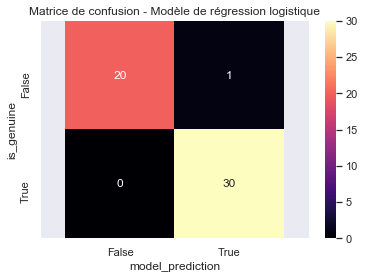

Taux de succès du modèle: 98.04


In [57]:
confusion1=pd.crosstab(test.is_genuine, test.model_prediction)

sns.heatmap(confusion1, annot=True, cmap="magma")
plt.title("Matrice de confusion - Modèle de régression logistique")
plt.axis("equal")
plt.savefig("data/projet_6/graphiques/m3_1_confusion_rg1.png")

plt.show()

print("Taux de succès du modèle:", 100*round(metrics.accuracy_score(test["is_genuine"], test["model_prediction"]), 4))

 La matrice de confusion nous indique que sur les 51 billets du jeu de tests, le modèle n'a effectué qu'une seule erreur en prédisant "True" pour un faux billet. Observons enfin les taux de vrais billets prédits faux et de faux billets prédits vrais sur la courbe ROC pour la performance de notre classificateur.

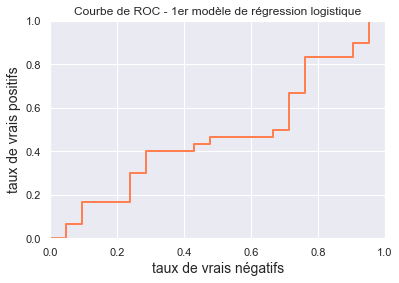

AUROC de l'estimateur: 0.473015873015873
Sensibilité : 1.00
Spécificité : 0.05
Seuil : 0.00
Seuil de décision: 100.0 %


In [58]:
y_pred_proba = modele.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='coral', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('taux de vrais négatifs', fontsize=14)
plt.ylabel('taux de vrais positifs', fontsize=14)
plt.title("Courbe de ROC - 1er modèle de régression logistique")
plt.savefig("data/projet_6/graphiques/m3_2_roc_rg1.png")
plt.show()


#On prendra une décision selon la sensibilité pour ce modèle:
seuil_decision = 1-confusion1.iloc[1, 0]/confusion1.iloc[1].sum()
idx = np.min(np.where(tpr >= seuil_decision)) 

#On évalue l'aire sous  la courbe ROC, la sensibilité et la spécificité de l'estimateur:
print("AUROC de l'estimateur:", metrics.auc(fpr, tpr))
print("Sensibilité : {:.2f}".format(tpr[idx]))
print("Spécificité : {:.2f}".format(1-fpr[idx]))
print("Seuil : {:.2f}".format(thr[idx]))
print("Seuil de décision:", round(100*seuil_decision, 0), "%")

 On observe alors un AUROC proche de 0.5, le classificateur semble donc très aléatoire. Cependant, on constate qu'à un seuil de décision de 97%, l'estimateur nous garantit une sensibilité de 100%. Nous pouvons alors finalement accepter l'estimateur comme fiable au seuil de 97%.

# M3.II. Régression logistique selon les composantes principales de l'ACP

 Nous allons réitérer les mêmes opérations que dans la première partie de la mission 3, mais cette fois-ci, en étudiant la variable-cible "is_genuine" selon les deux premières composantes principales F1 et F2 obtenues lors de l'ACP.

In [36]:
#Créons le DataFrame "billets_acp" qui contient ces deux variables facteures et la variable-cible:

composantes["is_genuine"]=billets["is_genuine"]
billets_acp=composantes[["F1", "F2", "is_genuine"]]

billets_acp

,F1,F2,is_genuine
0,2.153639,1.599709,True
1,-2.110416,-0.526039,True
2,-1.973152,-0.048102,True
3,-2.059795,-0.089105,True
4,-2.403180,0.412170,True
...,...,...,...
165,2.478626,0.189974,False
166,2.585331,2.914472,False
167,2.067245,0.845602,False
168,0.739257,-0.972965,False


In [37]:
#Vérifions la p_value des variables facteures par régression logistique selon stats_models:

X2=billets_acp[["F1", "F2"]]

reg2=sm.Logit(billets_acp.is_genuine, X2).fit(method="lbfgs")
print(reg2.summary())

                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                  170
Model:                          Logit   Df Residuals:                      168
Method:                           MLE   Df Model:                            1
Date:                Thu, 25 Jun 2020   Pseudo R-squ.:                  0.8703
Time:                        15:19:59   Log-Likelihood:                -14.943
converged:                       True   LL-Null:                       -115.17
Covariance Type:            nonrobust   LLR p-value:                 1.656e-45
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
F1            -3.3735      0.685     -4.922      0.000      -4.717      -2.030
F2             2.4916      0.613      4.063      0.000       1.290       3.694

Possibly complete quasi-separation: A fraction 0.11

 Les deux pvalues étant nulles, nous pouvons sereinement utiliser les deux variables F1 et F2 comme variables facteurs pour ce deuxième modèle de régression logistique.

In [38]:
#Soit X2, les variables-facteurs et y2, la variable-cible:

X2=billets_acp[["F1", "F2"]]
y2=billets_acp["is_genuine"].values

#Créons, ici, le jeu de test et le jeu d'entraînement:

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3)
print(X2_train.shape, y2_train.shape)

(119, 2) (119,)


 Créons alors un nouvel estimateur et faisons un test de validation-croisé sur ce nouveau modèle de régression logistique.

In [39]:
#Nous choisirons la fonction LogisticRegression comme estimateur:
LR2=LogisticRegression(random_state=0, solver="lbfgs")

#Puis exécutons les tests de validations-croisées de cet estimateur sur le jeu d'entraînement:
print(cross_val_score(LR2, X2_train, y2_train, cv=5))
print("moyenne des scores:", cross_val_score(LR2, X2_train, y2_train, cv=5).mean())
print("variance des scores:", cross_val_score(LR2, X2_train, y2_train, cv=5).var())

[0.95833333 0.95833333 1.         0.95833333 1.        ]
moyenne des scores: 0.975
variance des scores: 0.000416666666666666


 Par un raisonnement analogue aux résultats de test de validation-croisé du premier modèle lors de la partie I, nous constatons qu'il n'y a pas de surajustement. Nous pouvons donc entraîner notre deuxième modèle de régression logistique que nous appellerons "modèle2" sur ce deuxième jeu d'entraînement.

In [40]:
modele2 = LR2.fit(X2_train, y2_train)

#Puis observons les score obtenu par ce model:
print("score du jeu d'entraînement:", LR2.score(X2_train, y2_train))
print("score du jeu de test:", LR2.score(X2_test, y2_test))

score du jeu d'entraînement: 0.9747899159663865
score du jeu de test: 0.9411764705882353


 Les scores nous conduisent à la même conclusion que pour le premier modèle: nous pouvons considérer ce deuxième modèle comme étant fiable. Nous allons maintenant déterminer la matrice de confusion de ce second modèle, ainsi que sa courbe ROC.

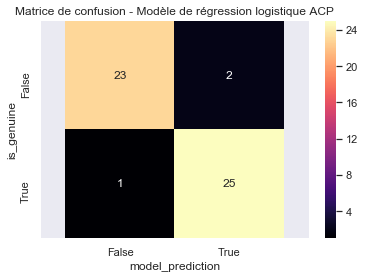

Taux de succès du modèle: 94.12


In [41]:
#Procédons de façon analogue à la partie I:

X2_test=X2_test.sort_index()

test2=pd.DataFrame({"numero_billet": [i for  i in X2_test.index],
                    "probability_to_be_true": [modele2.predict_proba(X2_test[X2_test.index==i])[0][1] for i in X2_test.index],
                    "model_prediction": [modele2.predict(X2_test[X2_test.index==i])[0] for i in X2_test.index]})

test2=test2.set_index("numero_billet")

genuine2=billets_acp[["is_genuine"]]
genuine2=genuine2.loc[genuine2.index.isin(test2.index)==True]

test2["is_genuine"]=genuine2["is_genuine"]



#Puis créons la matrice de confusion:

confusion2=pd.crosstab(test2.is_genuine, test2.model_prediction)

sns.heatmap(confusion2, annot=True, cmap="magma")
plt.title("Matrice de confusion - Modèle de régression logistique ACP")
plt.axis("equal")
plt.savefig("data/projet_6/graphiques/m3_3_confusion_rg2.png")
plt.show()

print("Taux de succès du modèle:", 100*round(metrics.accuracy_score(test2["is_genuine"], test2["model_prediction"]), 4))

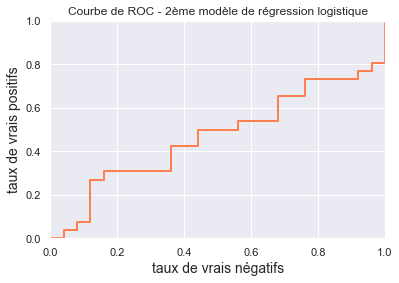

0.4676923076923077
AUROC de l'estimateur: 0.4676923076923077
Sensibilité : 1.00
Spécificité : 0.00
Seuil : 0.00
Seuil de décision: 92.0 %


In [42]:
#Enfin, on trace sa courbe ROC:

y_pred_proba2 = modele2.predict_proba(X2_test)[:, 0]
[fpr, tpr, thr] = metrics.roc_curve(y2_test, y_pred_proba2)
plt.plot(fpr, tpr, color='coral', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('taux de vrais négatifs', fontsize=14)
plt.ylabel('taux de vrais positifs', fontsize=14)
plt.title("Courbe de ROC - 2ème modèle de régression logistique")
plt.savefig("data/projet_6/graphiques/m3_4_roc_rg2.png")
plt.show()
print(metrics.auc(fpr, tpr))

#Nous prendrons cette fois-ci une décision selon la spécificité de l'estimateur:
seuil_decision2 = 1-confusion2.iloc[0, 1]/confusion2.iloc[0].sum()
idx2 = np.min(np.where(tpr > seuil_decision2)) 

#On évalue l'aire sous  la courbe ROC, la sensibilité et la spécificité de l'estimateur:
print("AUROC de l'estimateur:", metrics.auc(fpr, tpr))
print("Sensibilité : {:.2f}".format(tpr[idx2]))
print("Spécificité : {:.2f}".format(1-fpr[idx2]))
print("Seuil : {:.2f}".format(thr[idx2]))
print("Seuil de décision:", round(100*seuil_decision2, 0), "%")

 On observe alors encore un AUROC proche de 0.5, mais à un seuil de décision de 96%, l'estimateur nous garantit une spécificité de 0,08%. Nous pouvons alors finalement accepter l'estimateur comme fiable au seuil de 96%.

# M3.III. Algorithmes de classification

 Nous allons créer deux algorithmes de régressions logistiques, qui prendront tous deux une liste de billets caractérisés par les même variable que notre jeu de données initial, et qui nous renverra la liste de ces billets, indexé par leur identifiant, avec leur probabilité d'être vrais selon le modèle de régression logistique utilisé, ainsi qu'une colonne affichant "True" si cette probabilité est supérieure ou égale à 0.5, False sinon. Nous testerons ces deux algorithmes sur le DataFrame "example" définit ci-dessous.

In [43]:
example=pd.read_csv("data/example.csv")
example

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


## M3.III.1. Selon le premier modèle de régression logistique

 Créons la fonction "ptbt_modele1" pour "probability to be true" selon le premier modèle de régression logistique définit dans la partie I.2. de la mission 3.

In [68]:
def ptbt_modele1(data):
    df=data.copy()
    
    variables=['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', "length"]
    variables_facteurs=["margin_low", "length"]
    
    Z_scaled=pd.DataFrame(std_scaler.transform(df[variables]),
                          index=df.index,
                          columns=variables)    
    Z_scaled=Z_scaled[variables_facteurs]
    
    probability=modele.predict_proba(Z_scaled)[:, 1]
    
    predit=[]
    for i in probability:
        if i>=0.5:
            predit.append(True)
        else: predit.append(False)
    
    df["probability_to_be_true"]=probability
    df["prediction"]=predit
    
    return(df[["id", "probability_to_be_true", "prediction"]].set_index("id"))

In [70]:
#Test de cette fonction sur "example":
ptbt_modele1(example)

,probability_to_be_true,prediction
id,,
A_1,0.009087,False
A_2,0.003468,False
A_3,0.028754,False
A_4,0.941255,True
A_5,0.995795,True


## M3.III.2. Selon le second modèle de régression logistique

 Créons la fonction "ptbt_modele2" pour "probability to be true" selon le deuxième modèle de régression logistique définit dans la partie II de la mission 3.

In [71]:
def ptbt_modele2(data):
    df=data.copy()
    
    variables=['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', "length"]
    variables_facteurs=["F1", "F2"]
    
    Z=df[variables].values
    Z_scaled= std_scaler.transform(Z)
    
    Z_comp=pd.DataFrame(pca.transform(Z_scaled), 
                        index=example.index,
                        columns=["F1", "F2", "F3", "F4", "F5", "F6"])
    
    Z_comp=Z_comp[variables_facteurs]
    
    probability=modele2.predict_proba(Z_comp)[:, 1]
    
    predit=[]
    for i in probability:
        if i>=0.5:
            predit.append(True)
        else: predit.append(False)
    
    df["probability_to_be_true"]=probability
    df["prediction"]=predit
    
    return(df[["id", "probability_to_be_true", "prediction"]].set_index("id"))

 Enfin, nous concluerons ce projet en appliquant cette fonction sur "example" où nous observerons les mêmes résultats dans la colonne "prediction".

In [72]:
ptbt_modele2(example)

,probability_to_be_true,prediction
id,,
A_1,0.076651,False
A_2,0.014008,False
A_3,0.021469,False
A_4,0.978331,True
A_5,0.992814,True


In [73]:
table=pd.read_csv("data/table.csv")
table

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5


In [76]:
ptbt_modele1(table)

,probability_to_be_true,prediction
id,,
B_1,0.948933,True
B_2,0.021256,False
B_3,0.995881,True
B_4,0.001102,False
B_5,0.060048,False


In [77]:
ptbt_modele2(table)

,probability_to_be_true,prediction
id,,
B_1,0.988161,True
B_2,0.027113,False
B_3,0.987705,True
B_4,0.018912,False
B_5,0.079100,False
